In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
#import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import rioxarray as rxr
# Rasterstats contains the zonalstatistics function
# that you will use to extract raster values
import rasterstats as rs
import earthpy as et
import earthpy.plot as ep

In [ ]:
cameroon < raster("~/Desktop/Research/Cameroon/CHM_1m.tif")
camelev <- raster("~/Desktop/Research_2022/Data/GEDI/DTM_1m.tif")

In [11]:
os.chdir("/Users/nomes/Desktop")

In [13]:
sjer_chm_data = rxr.open_rasterio("Research/Cameroon/CHM_1m.tif", masked=True).squeeze()

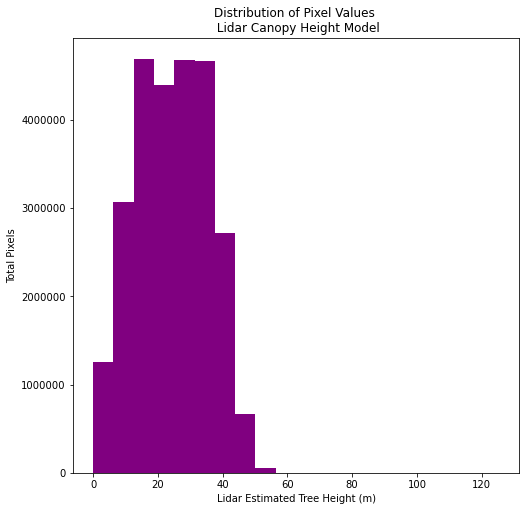

In [14]:
# Explore the data by plotting a histogram with earthpy
ax = ep.hist(sjer_chm_data.values,
             figsize=(8, 8),
             colors="purple",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

In [15]:
# EXPLORE: View summary statistics of canopy height model
# Notice the mean value with 0's included in the data
print('Mean:', sjer_chm_data.mean().values)
print('Max:', sjer_chm_data.max().values)
print('Min:', sjer_chm_data.min().values)

Mean: 24.393204
Max: 125.30000305175781
Min: 0.0


In [17]:
sjer_plots_points = gpd.read_file("Research_2022/Data/cam_buff.shp")

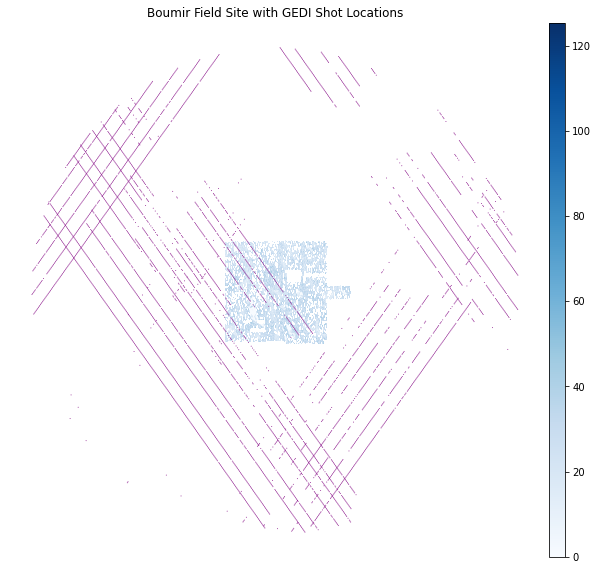

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(sjer_chm_data,
              extent=plotting_extent(sjer_chm_data,
                                     sjer_chm_data.rio.transform()),  # Set spatial extent
              cmap='Blues',
              title="Boumir Field Site with GEDI Shot Locations",
              scale=False,
              ax=ax)

sjer_plots_points.plot(ax=ax,
                       marker='s',
                       markersize=45,
                       color='purple')
ax.set_axis_off()
plt.show()

In [26]:
# Extract zonal stats
sjer_tree_heights = rs.zonal_stats("Research_2022/Data/cam_buff.shp",
                                   sjer_chm_data.values,
                                   nodata=-999,
                                   affine=sjer_chm_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

In [28]:
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
sjer_lidar_height_df.tail()

,geometry,___1,___2,ShtIndx,Sht_Nmb,Latitud,Longitd,Beam,T-X_DEM,Elevatn,...,Snstv_2,Snstv_3,distanc,dstnc__,ds__IRD,count,min,mean,max,median
6222,"POLYGON ((247599.559 360512.728, 247598.482 36...",113810.0,654478.0,898.0,s173381100200066116,3.259062,12.728489,BEAM1011,690.42460,655.66016,...,0.981193,0.960296,3.394051,11.979788,11.937500,0,NaN,NaN,NaN,NaN
6223,"POLYGON ((247632.732 360559.264, 247631.656 36...",113811.0,654479.0,899.0,s173381100200066117,3.259483,12.728786,BEAM1011,679.63080,653.17610,...,0.976546,0.955224,3.349027,11.983717,11.938874,0,NaN,NaN,NaN,NaN
6224,"POLYGON ((247665.891 360605.776, 247664.814 36...",113812.0,654480.0,900.0,s173381100200066118,3.259904,12.729083,BEAM1011,685.00180,653.57434,...,0.979368,0.960800,3.304191,11.987912,11.940518,0,NaN,NaN,NaN,NaN
6225,"POLYGON ((247699.112 360652.382, 247698.035 36...",113813.0,654481.0,901.0,s173381100200066119,3.260326,12.729381,BEAM1011,685.00180,649.63715,...,0.977746,0.957515,3.259653,11.992391,11.942443,0,NaN,NaN,NaN,NaN
6226,"POLYGON ((247732.322 360698.970, 247731.245 36...",113814.0,654482.0,902.0,s173381100200066120,3.260748,12.729679,BEAM1011,681.85077,651.77600,...,0.982368,0.962778,3.215532,11.997139,11.944640,0,NaN,NaN,NaN,NaN
